# Predict Age with Biomarkers  
  
## Index  
  
1. [Introduction](#introduction)
2. [Library import](#library-import)
3. [Data import](#data-import)
4. [First exploratory analysis](#first-exploratory-analysis)
5. [Data cleaning](#data-cleaning)
6. [Univariate analysis](#univariate-analysis)
7. [Bivariate analysis](#bivariate-analysis)
8. [Conclusion](#conclusion)

## 1. Introduction
The goal is to predict the age of individuals using biomarkers as reference. First, an exploratory data analysis (EDA) is performed prior to the development of predictive models.

- **Objective**: Conduct an exploratory analysis of the pre-arranged data.  

## 2. Library import  
First stept, the neccesary libraries are imported.

In [35]:
import pandas as pd
import utils.functions as fn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 3. Data import
Next, the data is imported. The data is imported as a `pandas` dataframe.

In [36]:
# Load train dataset
df_train = pd.read_csv('data/train/Train.csv')
df_train.head()

,ID,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,1,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,2,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,3,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,4,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,5,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [37]:
# Load test dataset
df_test = pd.read_csv('data/test/Test.csv')
df_test.head()

,ID,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,...,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level
0,1,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,...,NaN,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium
1,2,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,...,NaN,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium
2,3,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,...,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium
3,4,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,...,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low
4,5,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,...,NaN,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High


## 4. First exploratory analysis  
  
An initial exploratory analysis is conducted to understand the data format, check for null values, and analyze their distribution.  
  
### Train dataset

In [38]:
# observation of data format
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3000 non-null   int64  
 1   Gender                       3000 non-null   object 
 2   Height (cm)                  3000 non-null   float64
 3   Weight (kg)                  3000 non-null   float64
 4   Blood Pressure (s/d)         3000 non-null   object 
 5   Cholesterol Level (mg/dL)    3000 non-null   float64
 6   BMI                          3000 non-null   float64
 7   Blood Glucose Level (mg/dL)  3000 non-null   float64
 8   Bone Density (g/cm²)         3000 non-null   float64
 9   Vision Sharpness             3000 non-null   float64
 10  Hearing Ability (dB)         3000 non-null   float64
 11  Physical Activity Level      3000 non-null   object 
 12  Smoking Status               3000 non-null   object 
 13  Alcohol Consumptio

In [39]:
# observation of data distribution
df_train.describe()

,ID,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,866.169729,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,1.000000,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,750.750000,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,1500.500000,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,2250.250000,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,3000.000000,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


### Test dataset

In [40]:
# observation of data format
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3000 non-null   int64  
 1   Gender                       3000 non-null   object 
 2   Height (cm)                  3000 non-null   float64
 3   Weight (kg)                  3000 non-null   float64
 4   Blood Pressure (s/d)         3000 non-null   object 
 5   Cholesterol Level (mg/dL)    3000 non-null   float64
 6   BMI                          3000 non-null   float64
 7   Blood Glucose Level (mg/dL)  3000 non-null   float64
 8   Bone Density (g/cm²)         3000 non-null   float64
 9   Vision Sharpness             3000 non-null   float64
 10  Hearing Ability (dB)         3000 non-null   float64
 11  Physical Activity Level      3000 non-null   object 
 12  Smoking Status               3000 non-null   object 
 13  Alcohol Consumptio

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3000 non-null   int64  
 1   Gender                       3000 non-null   object 
 2   Height (cm)                  3000 non-null   float64
 3   Weight (kg)                  3000 non-null   float64
 4   Blood Pressure (s/d)         3000 non-null   object 
 5   Cholesterol Level (mg/dL)    3000 non-null   float64
 6   BMI                          3000 non-null   float64
 7   Blood Glucose Level (mg/dL)  3000 non-null   float64
 8   Bone Density (g/cm²)         3000 non-null   float64
 9   Vision Sharpness             3000 non-null   float64
 10  Hearing Ability (dB)         3000 non-null   float64
 11  Physical Activity Level      3000 non-null   object 
 12  Smoking Status               3000 non-null   object 
 13  Alcohol Consumptio

In [42]:
# observation of data distribution
df_test.describe()

,ID,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785
std,866.169729,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595
min,1.000000,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055
25%,750.750000,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285
50%,1500.500000,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789
75%,2250.250000,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349
max,3000.000000,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504


### Conclusion of first exploratory analysis  
  
It is observed that there are various features with different formats. Some "object" type features contain null values that will need to be addressed. The data distribution varies across features, showing different maximums and minimums, as well as different scales between features.

## 5. Data cleaning  
  
Data cleaning is necessary to address null values and incorrect data formats.  
  
### Train dataset

In [43]:
# observe features with missing values
blank_features = df_train[["Alcohol Consumption", "Chronic Diseases", "Medication Use", "Family History", "Education Level"]]
blank_features.sample(15)

,Alcohol Consumption,Chronic Diseases,Medication Use,Family History,Education Level
1720,NaN,NaN,Occasional,NaN,Postgraduate
621,NaN,NaN,NaN,NaN,NaN
1761,NaN,Heart Disease,Occasional,Heart Disease,Postgraduate
1089,Occasional,Hypertension,Regular,Heart Disease,NaN
1977,Occasional,Diabetes,Regular,Diabetes,NaN
2942,NaN,Hypertension,Regular,Heart Disease,High School
933,NaN,NaN,NaN,NaN,High School
2830,Occasional,NaN,NaN,NaN,Undergraduate
2496,Occasional,Diabetes,Regular,NaN,Postgraduate
1094,Frequent,Hypertension,Regular,Diabetes,Postgraduate


In [44]:
# check if the alcoholic drinkers are minors
df_train[df_train["Education Level"].isna()][["Alcohol Consumption", "Chronic Diseases", "Medication Use", "Family History", "Education Level", "Age (years)"]].sample(10)

,Alcohol Consumption,Chronic Diseases,Medication Use,Family History,Education Level,Age (years)
2236,NaN,Heart Disease,Occasional,Heart Disease,NaN,28
2587,NaN,NaN,NaN,NaN,NaN,60
271,Occasional,Diabetes,Regular,Heart Disease,NaN,70
1222,Occasional,NaN,Regular,NaN,NaN,19
242,Occasional,Diabetes,Occasional,NaN,NaN,59
282,NaN,NaN,NaN,NaN,NaN,88
1965,Occasional,NaN,Occasional,NaN,NaN,29
1711,NaN,Hypertension,Occasional,Diabetes,NaN,63
2432,NaN,Heart Disease,NaN,NaN,NaN,71
2661,NaN,NaN,Occasional,Diabetes,NaN,26


In [45]:
# Assuming that the null values in "Alcohol Consumption" correspond to individuals who do not consume alcohol,
# that the nulls in "Chronic Diseases" correspond to individuals without diseases,
# that the nulls in "Medication Use" correspond to individuals who do not take medication,
# that the nulls in "Family History" correspond to individuals with no prior family diseases,
# and that the nulls in "Education Level" correspond to a lack of information, the null values will be imputed accordingly

df_train["Alcohol Consumption"] = df_train["Alcohol Consumption"].fillna("Never")
df_train["Chronic Diseases"] = df_train["Chronic Diseases"].fillna("Without")
df_train["Medication Use"] = df_train["Medication Use"].fillna("None")
df_train["Family History"] = df_train["Family History"].fillna("Without")
df_train["Education Level"] = df_train["Education Level"].fillna("Without information")

In [46]:
# Divide the "Blood Pressure" feature into two features: "Systolic Blood Pressure" and "Diastolic Blood Pressure"

df_train["Systolic Blood Pressure"] = df_train["Blood Pressure (s/d)"].apply(lambda x: x.split("/")[0]).astype("float64")
df_train["Diastolic Blood Pressure"] = df_train["Blood Pressure (s/d)"].apply(lambda x: x.split("/")[1]).astype("float64")
df_train.drop(["Blood Pressure (s/d)"], axis=1, inplace=True)

In [47]:
# Realice a maping to encoding some object features

# Physical Activity Level
pal_dict = {"Low": 0, "Moderate": 1, "High": 2}
df_train["Physical Activity Level"] = df_train["Physical Activity Level"].map(pal_dict)

# Smoking Status
smoking_map = {"Former": 0, "Current": 1, "Never": 2}
df_train["Smoking Status"] = df_train["Smoking Status"].map(smoking_map)

# Alcohol Consumption
alc_dict = {"Never": 0, "Occasional": 1, "Frequent": 2}
df_train["Alcohol Consumption"] = df_train["Alcohol Consumption"].map(alc_dict)

# Mental Health Status
mh_dict = {"Good": 0, "Fair": 1, "Poor": 2, "Excellent": 3}
df_train["Mental Health Status"] = df_train["Mental Health Status"].map(mh_dict)

# Sleep Patterns
sp_dict = {"Insomnia": 0, "Normal": 1, "Excessive": 2}
df_train["Sleep Patterns"] = df_train["Sleep Patterns"].map(sp_dict)

# Education Level
edu_map = {"Without information": 0, "Undergraduate": 1, "High School": 2, "Postgraduate": 3}
df_train["Education Level"] = df_train["Education Level"].map(edu_map)

# Income Level
income_map = {"Low": 0, "Medium": 1, "High": 2}
df_train["Income Level"] = df_train["Income Level"].map(income_map)



In [48]:
# Realice a get dummies to encoding the rest of object features
df_train = pd.get_dummies(df_train, columns=["Gender", "Diet", "Chronic Diseases", "Medication Use", "Family History"], drop_first=True)
df_train.set_index("ID", inplace=True)


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 1 to 3000
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height (cm)                     3000 non-null   float64
 1   Weight (kg)                     3000 non-null   float64
 2   Cholesterol Level (mg/dL)       3000 non-null   float64
 3   BMI                             3000 non-null   float64
 4   Blood Glucose Level (mg/dL)     3000 non-null   float64
 5   Bone Density (g/cm²)            3000 non-null   float64
 6   Vision Sharpness                3000 non-null   float64
 7   Hearing Ability (dB)            3000 non-null   float64
 8   Physical Activity Level         3000 non-null   int64  
 9   Smoking Status                  3000 non-null   int64  
 10  Alcohol Consumption             3000 non-null   int64  
 11  Cognitive Function              3000 non-null   float64
 12  Mental Health Status            3000 no

### Test dataset  
  
The procees is repeated for the test dataset.

In [50]:
# Null values imputation
df_test["Alcohol Consumption"] = df_test["Alcohol Consumption"].fillna("Never")
df_test["Chronic Diseases"] = df_test["Chronic Diseases"].fillna("Without")
df_test["Medication Use"] = df_test["Medication Use"].fillna("None")
df_test["Family History"] = df_test["Family History"].fillna("Without")
df_test["Education Level"] = df_test["Education Level"].fillna("Without information")

#Blood pressure feature divide
df_test["Systolic Blood Pressure"] = df_test["Blood Pressure (s/d)"].apply(lambda x: x.split("/")[0]).astype("float64")
df_test["Diastolic Blood Pressure"] = df_test["Blood Pressure (s/d)"].apply(lambda x: x.split("/")[1]).astype("float64")
df_test.drop(["Blood Pressure (s/d)"], axis=1, inplace=True)

# object feature mapping
df_test["Physical Activity Level"] = df_test["Physical Activity Level"].map(pal_dict)
df_test["Smoking Status"] = df_test["Smoking Status"].map(smoking_map)
df_test["Alcohol Consumption"] = df_test["Alcohol Consumption"].map(alc_dict)
df_test["Mental Health Status"] = df_test["Mental Health Status"].map(mh_dict)
df_test["Sleep Patterns"] = df_test["Sleep Patterns"].map(sp_dict)
df_test["Education Level"] = df_test["Education Level"].map(edu_map)
df_test["Income Level"] = df_test["Income Level"].map(income_map)

# get dummies
df_test = pd.get_dummies(df_test, columns=["Gender", "Diet", "Chronic Diseases", "Medication Use", "Family History"], drop_first=True)
df_test.set_index("ID", inplace=True)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 1 to 3000
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height (cm)                     3000 non-null   float64
 1   Weight (kg)                     3000 non-null   float64
 2   Cholesterol Level (mg/dL)       3000 non-null   float64
 3   BMI                             3000 non-null   float64
 4   Blood Glucose Level (mg/dL)     3000 non-null   float64
 5   Bone Density (g/cm²)            3000 non-null   float64
 6   Vision Sharpness                3000 non-null   float64
 7   Hearing Ability (dB)            3000 non-null   float64
 8   Physical Activity Level         3000 non-null   int64  
 9   Smoking Status                  3000 non-null   int64  
 10  Alcohol Consumption             3000 non-null   int64  
 11  Cognitive Function              3000 non-null   float64
 12  Mental Health Status            3000 no

## 6. Univariable Analysis
An univariate analysis is performed to observe the distribution of the features in the train dataset.

Univariate Analysis of Height (cm):


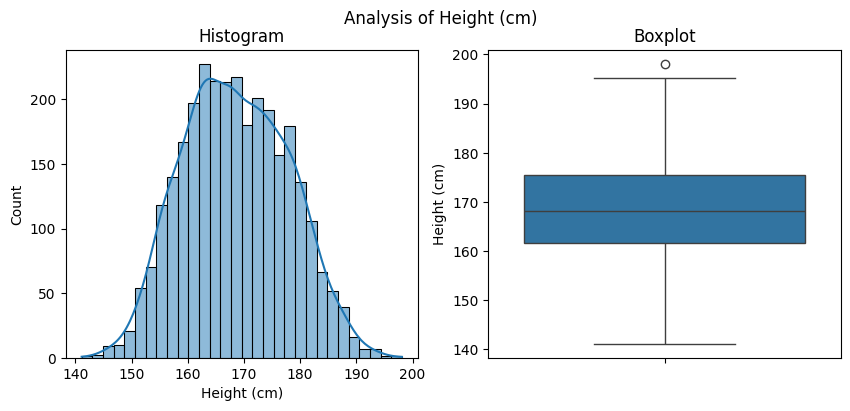

The column Height (cm) does not follow a normal distribution.



Univariate Analysis of Weight (kg):


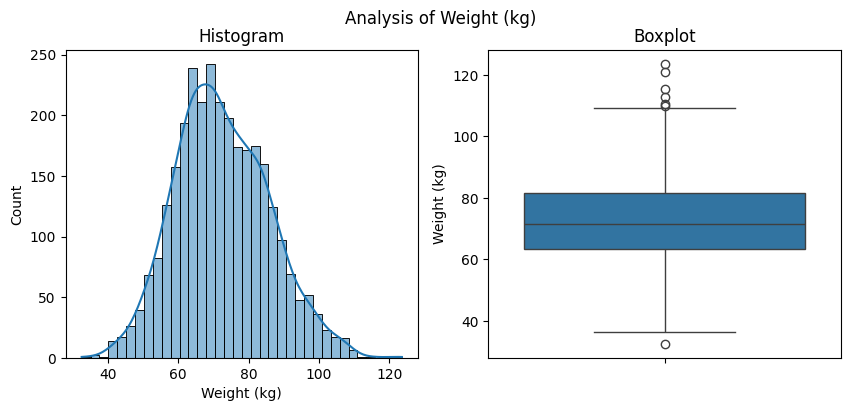

The column Weight (kg) does not follow a normal distribution.



Univariate Analysis of Cholesterol Level (mg/dL):


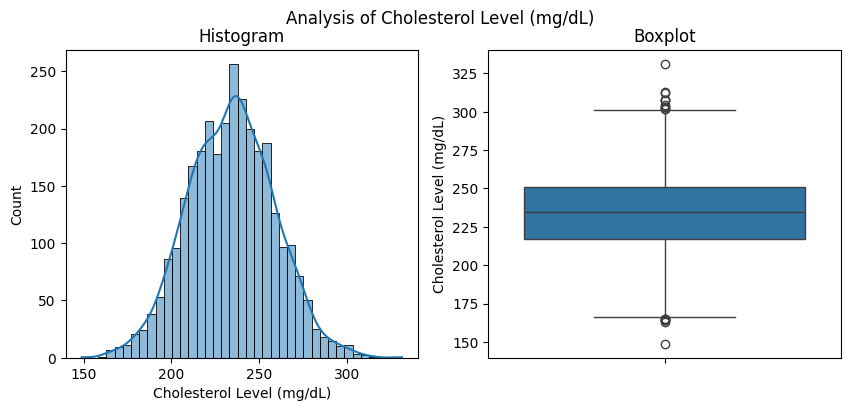

The column Cholesterol Level (mg/dL) does not follow a normal distribution.



Univariate Analysis of BMI:


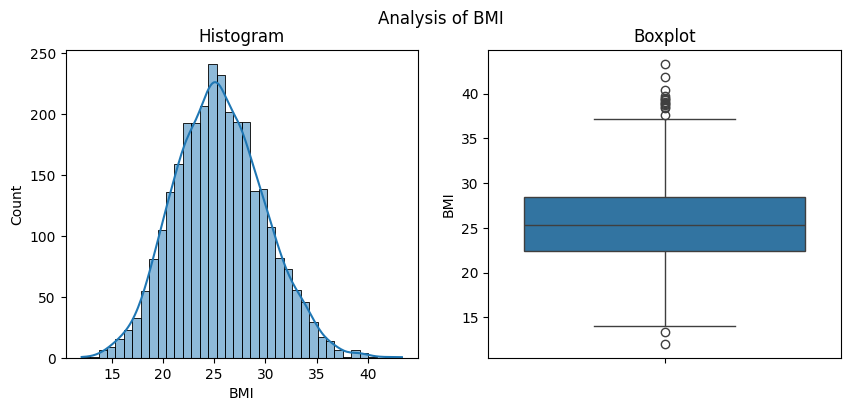

The column BMI does not follow a normal distribution.



Univariate Analysis of Blood Glucose Level (mg/dL):


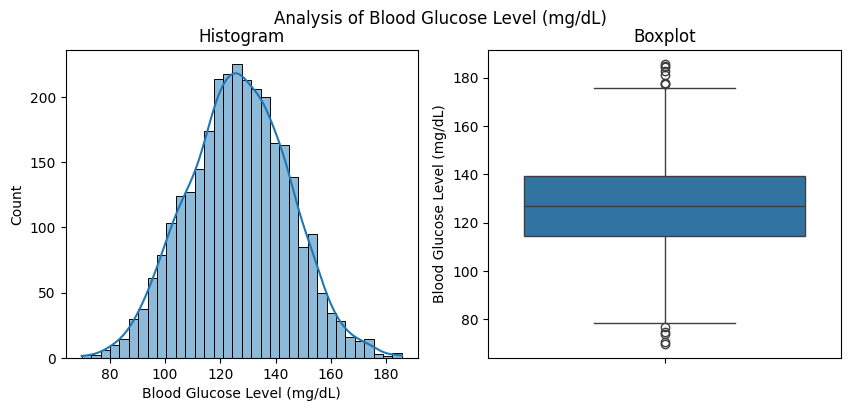

The column Blood Glucose Level (mg/dL) does not follow a normal distribution.



Univariate Analysis of Bone Density (g/cm²):


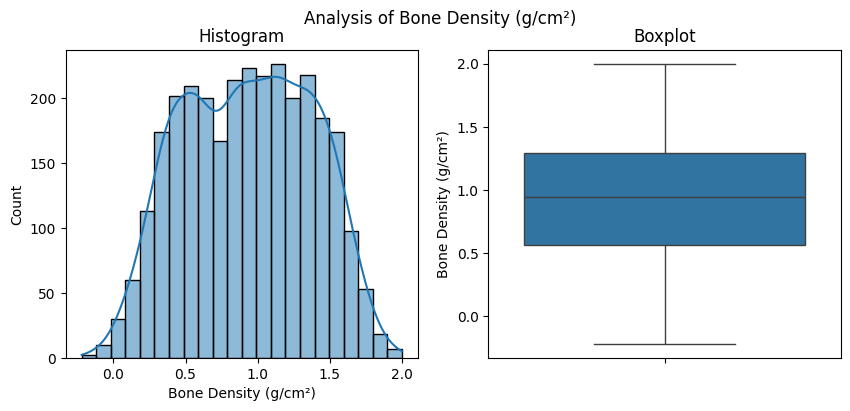

The column Bone Density (g/cm²) does not follow a normal distribution.



Univariate Analysis of Vision Sharpness:


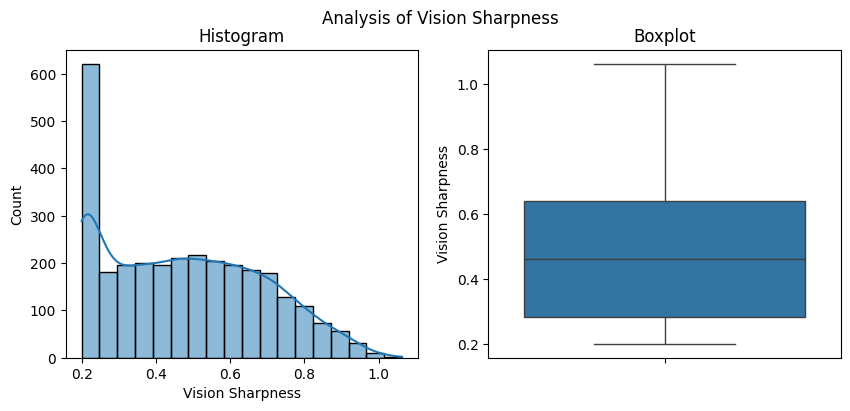

The column Vision Sharpness does not follow a normal distribution.



Univariate Analysis of Hearing Ability (dB):


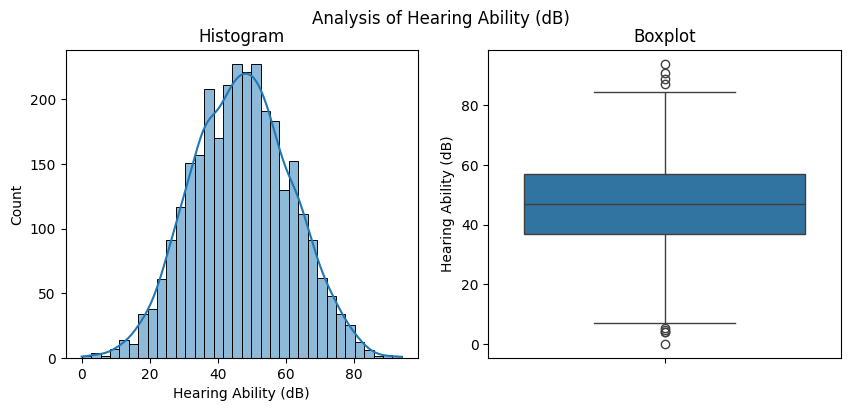

The column Hearing Ability (dB) does not follow a normal distribution.



Univariate Analysis of Physical Activity Level:


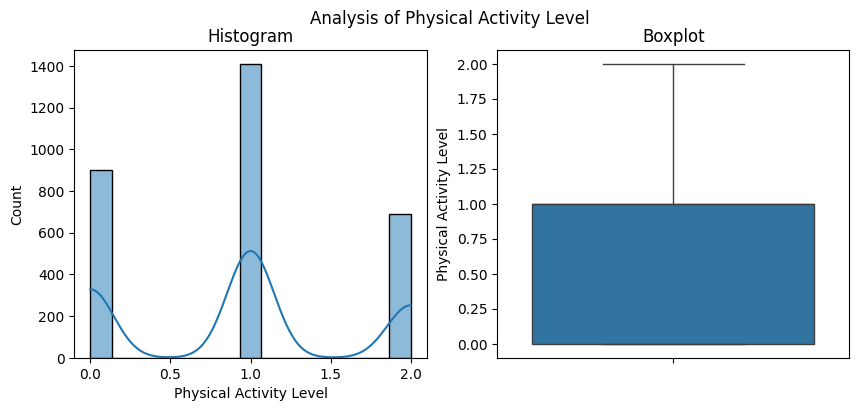

The column Physical Activity Level does not follow a normal distribution.



Univariate Analysis of Smoking Status:


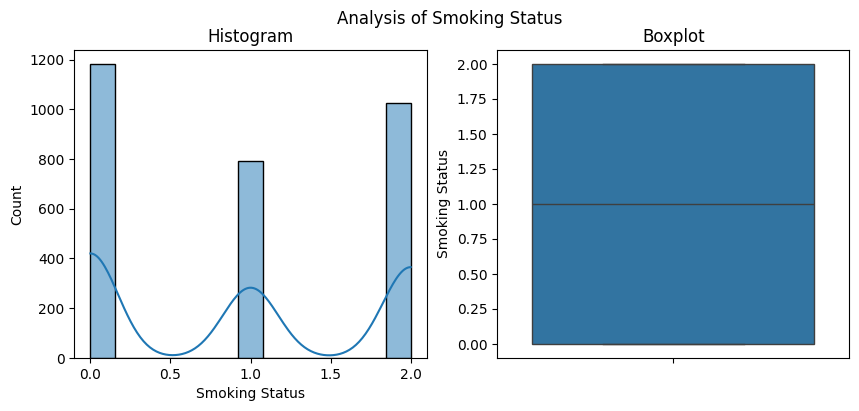

The column Smoking Status does not follow a normal distribution.



Univariate Analysis of Alcohol Consumption:


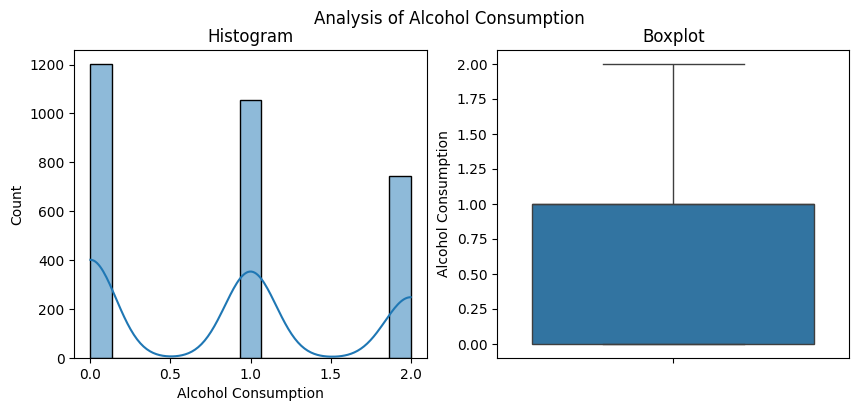

The column Alcohol Consumption does not follow a normal distribution.



Univariate Analysis of Cognitive Function:


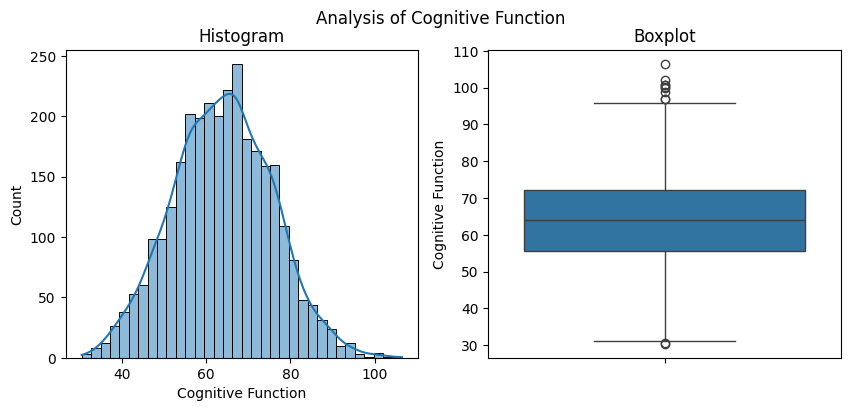

The column Cognitive Function does not follow a normal distribution.



Univariate Analysis of Mental Health Status:


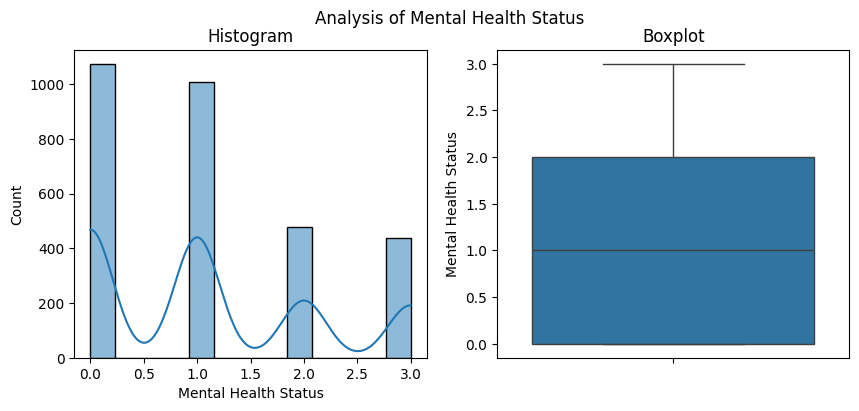

The column Mental Health Status does not follow a normal distribution.



Univariate Analysis of Sleep Patterns:


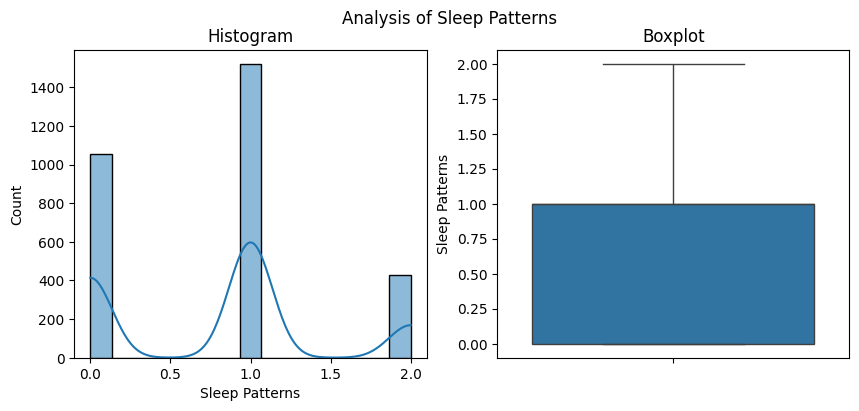

The column Sleep Patterns does not follow a normal distribution.



Univariate Analysis of Stress Levels:


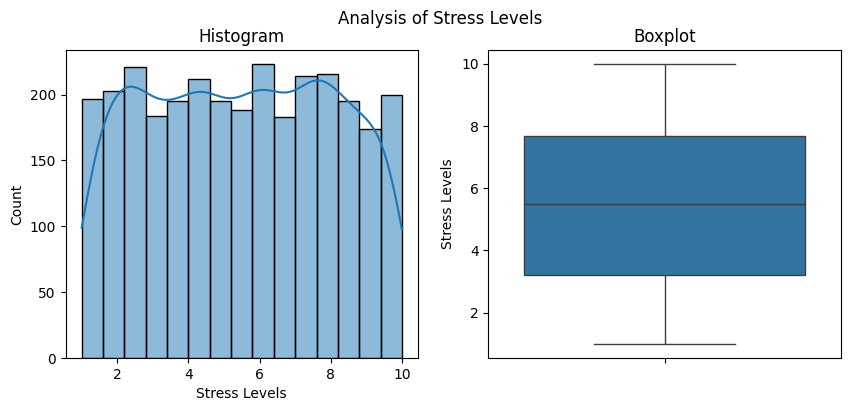

The column Stress Levels does not follow a normal distribution.



Univariate Analysis of Pollution Exposure:


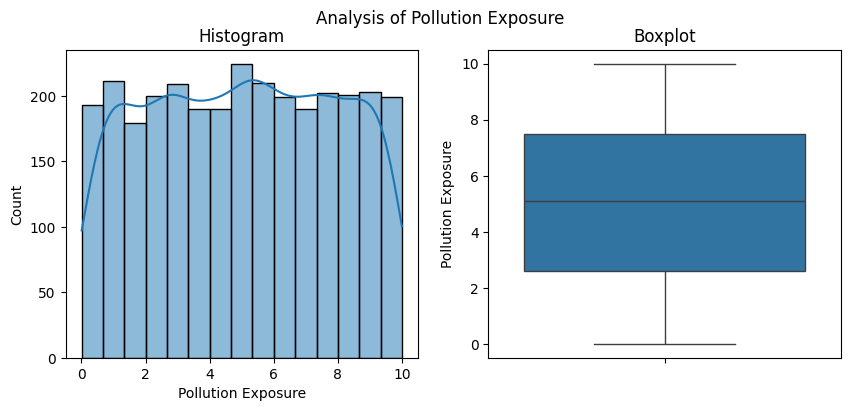

The column Pollution Exposure does not follow a normal distribution.



Univariate Analysis of Sun Exposure:


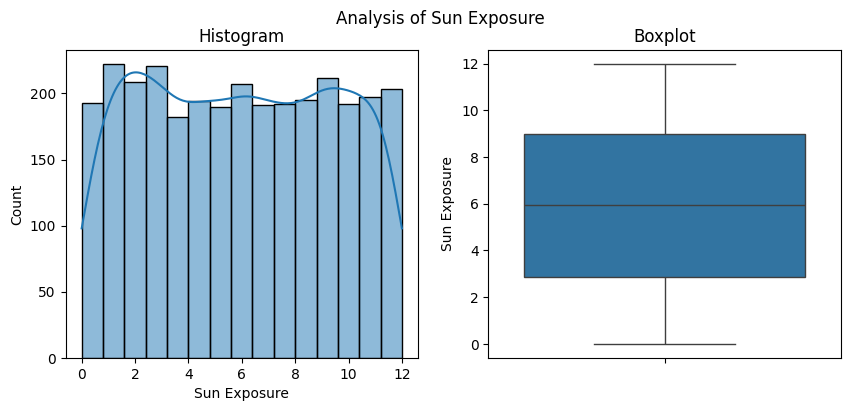

The column Sun Exposure does not follow a normal distribution.



Univariate Analysis of Education Level:


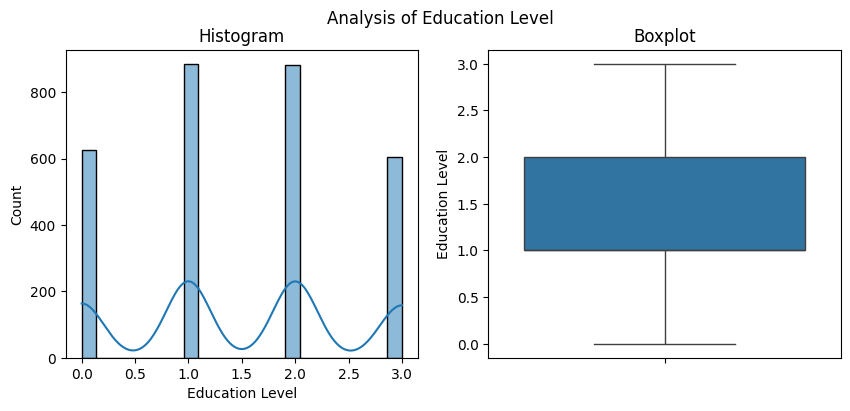

The column Education Level does not follow a normal distribution.



Univariate Analysis of Income Level:


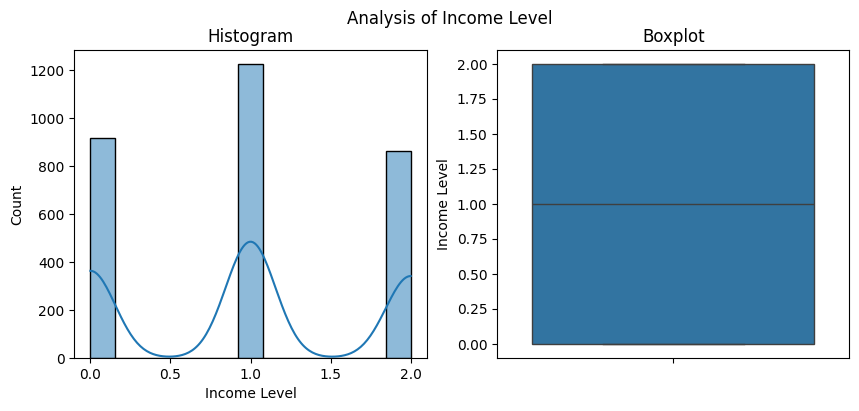

The column Income Level does not follow a normal distribution.



Univariate Analysis of Age (years):


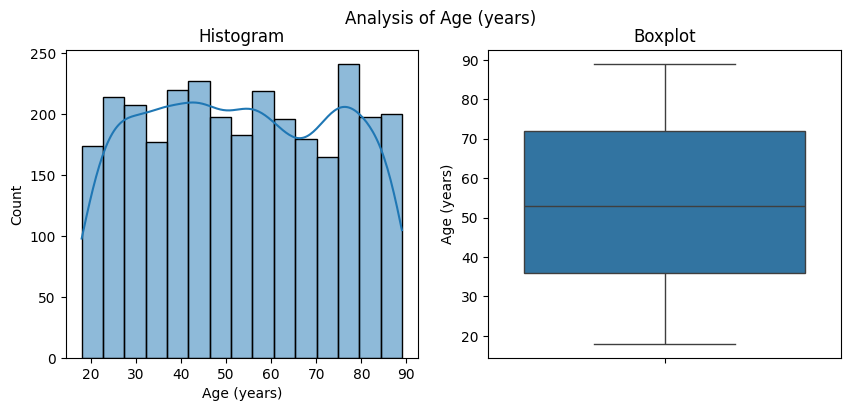

The column Age (years) does not follow a normal distribution.



Univariate Analysis of Systolic Blood Pressure:


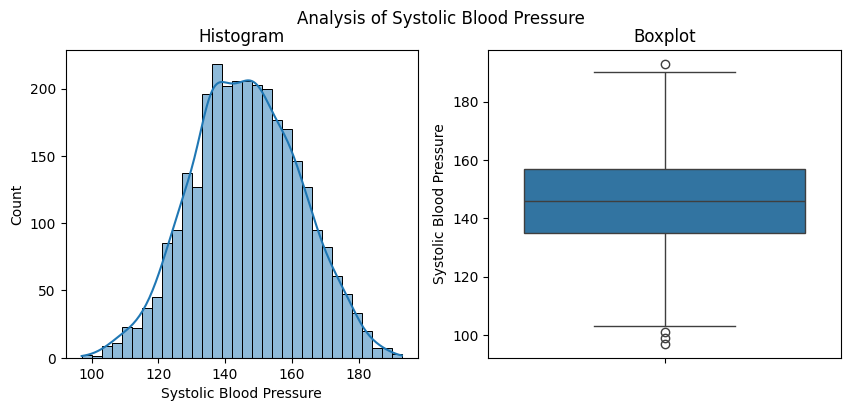

The column Systolic Blood Pressure does not follow a normal distribution.



Univariate Analysis of Diastolic Blood Pressure:


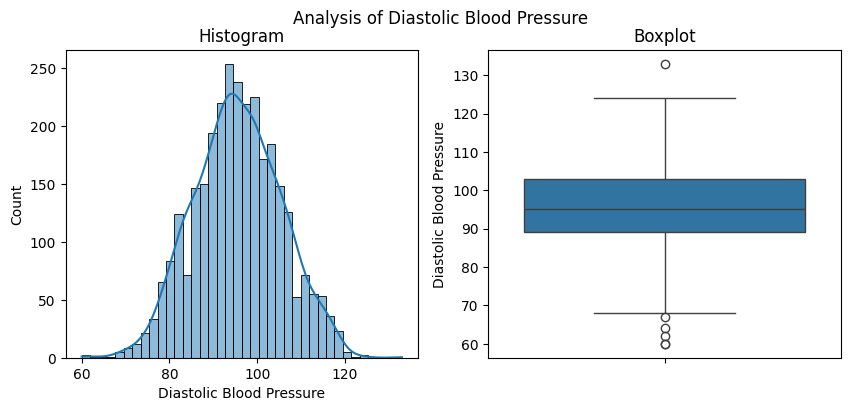

The column Diastolic Blood Pressure does not follow a normal distribution.



Univariate Analysis of Gender_Male:


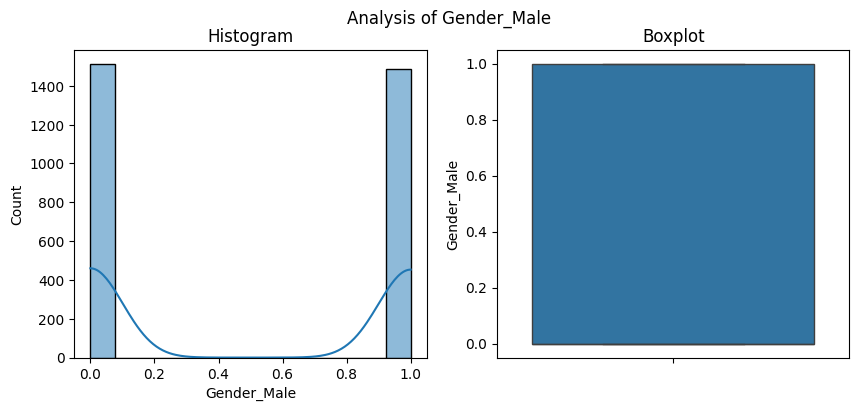

The column Gender_Male does not follow a normal distribution.



Univariate Analysis of Diet_High-fat:


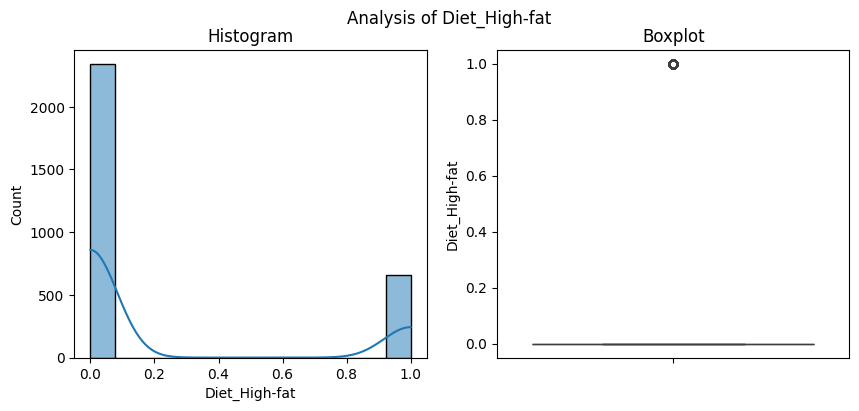

The column Diet_High-fat does not follow a normal distribution.



Univariate Analysis of Diet_Low-carb:


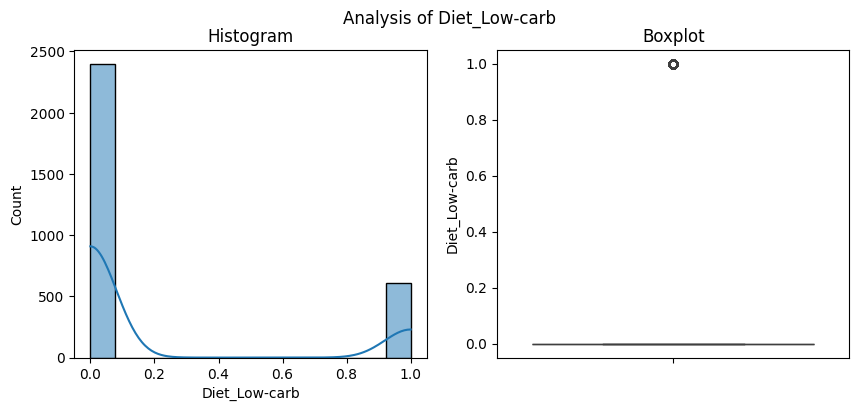

The column Diet_Low-carb does not follow a normal distribution.



Univariate Analysis of Diet_Vegetarian:


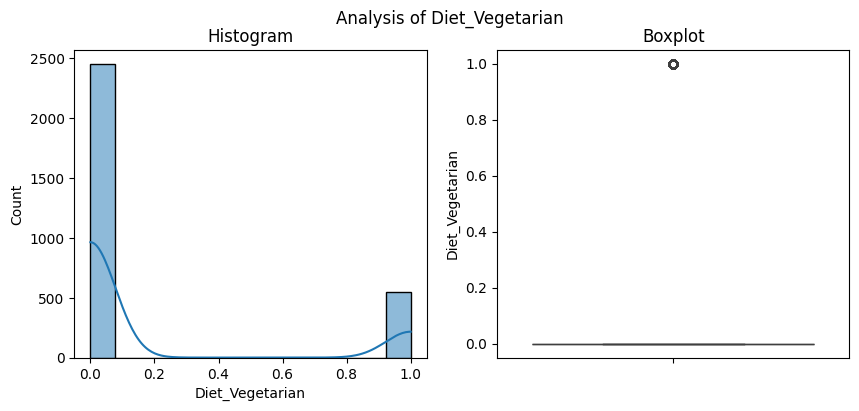

The column Diet_Vegetarian does not follow a normal distribution.



Univariate Analysis of Chronic Diseases_Heart Disease:


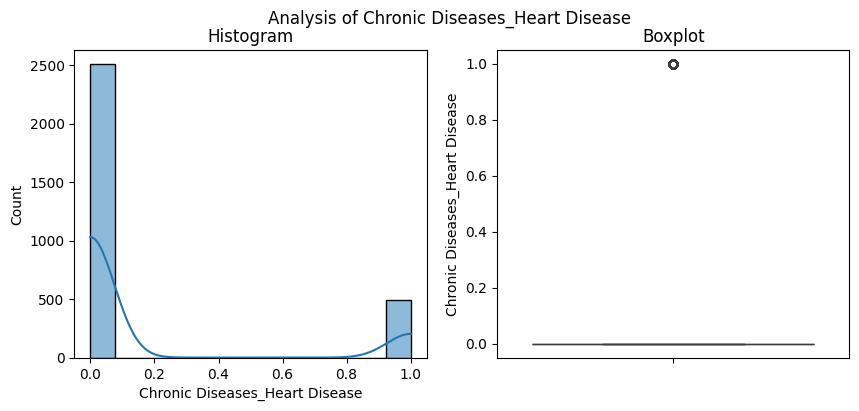

The column Chronic Diseases_Heart Disease does not follow a normal distribution.



Univariate Analysis of Chronic Diseases_Hypertension:


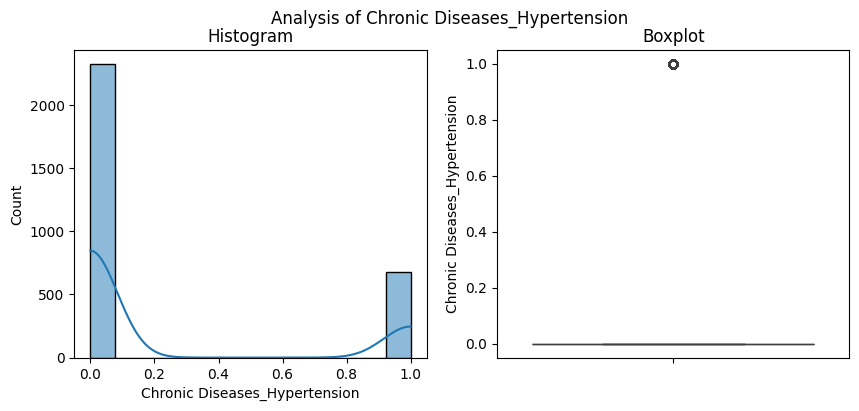

The column Chronic Diseases_Hypertension does not follow a normal distribution.



Univariate Analysis of Chronic Diseases_Without:


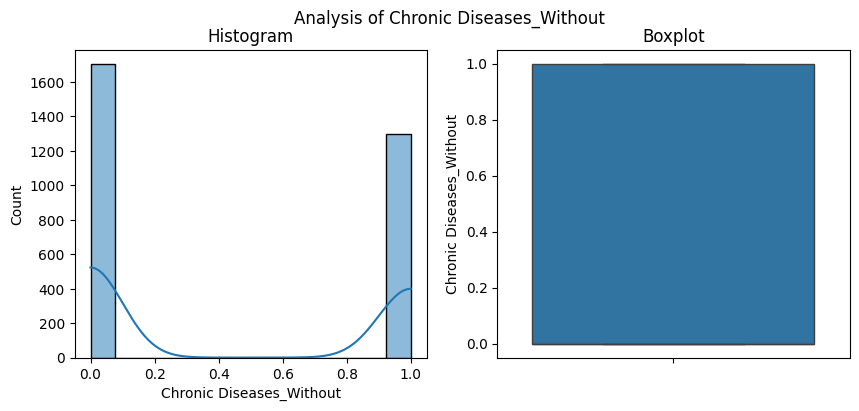

The column Chronic Diseases_Without does not follow a normal distribution.



Univariate Analysis of Medication Use_Occasional:


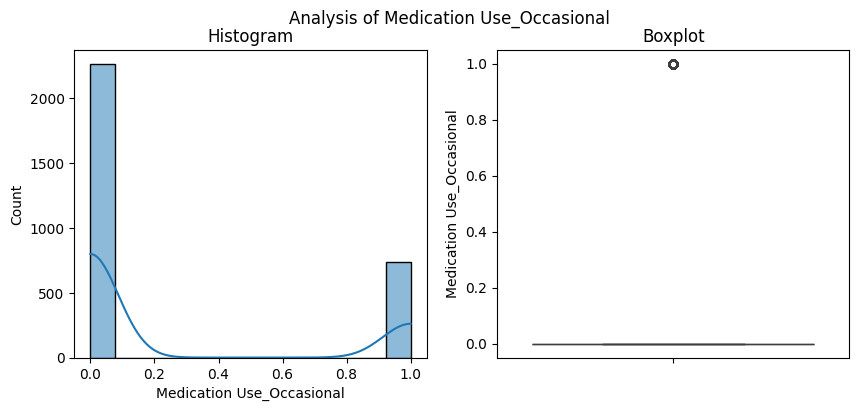

The column Medication Use_Occasional does not follow a normal distribution.



Univariate Analysis of Medication Use_Regular:


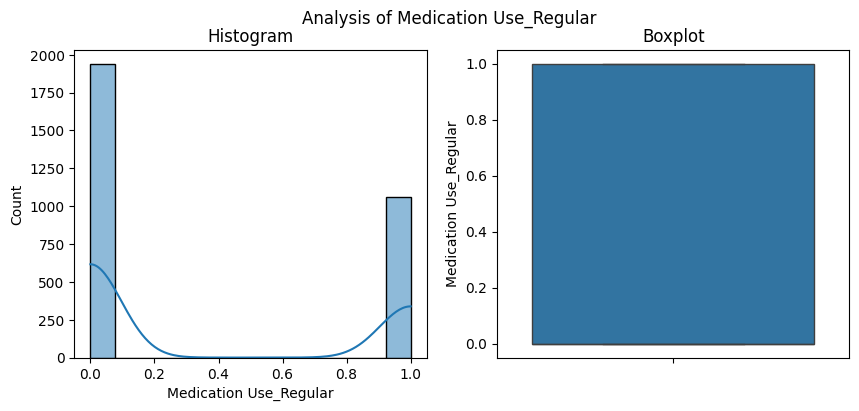

The column Medication Use_Regular does not follow a normal distribution.



Univariate Analysis of Family History_Heart Disease:


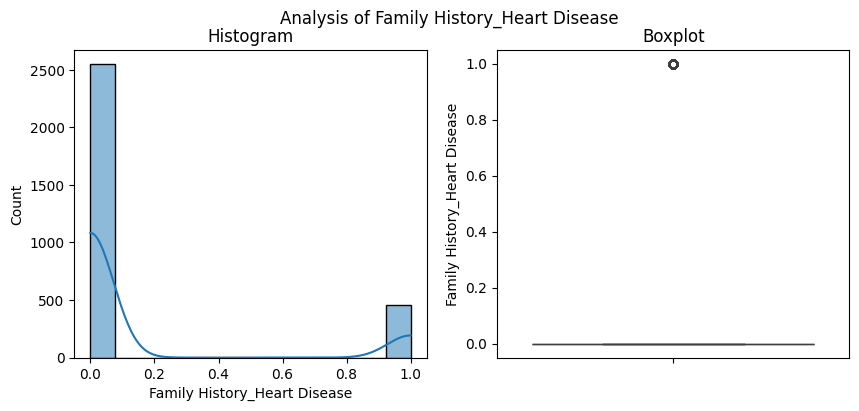

The column Family History_Heart Disease does not follow a normal distribution.



Univariate Analysis of Family History_Hypertension:


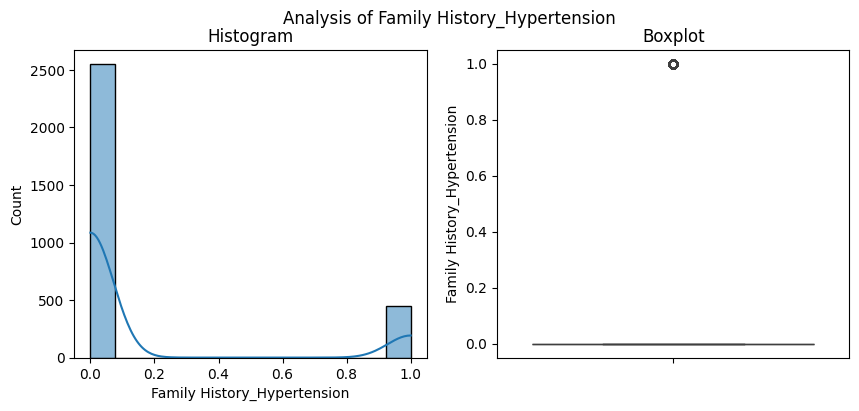

The column Family History_Hypertension does not follow a normal distribution.



Univariate Analysis of Family History_Without:


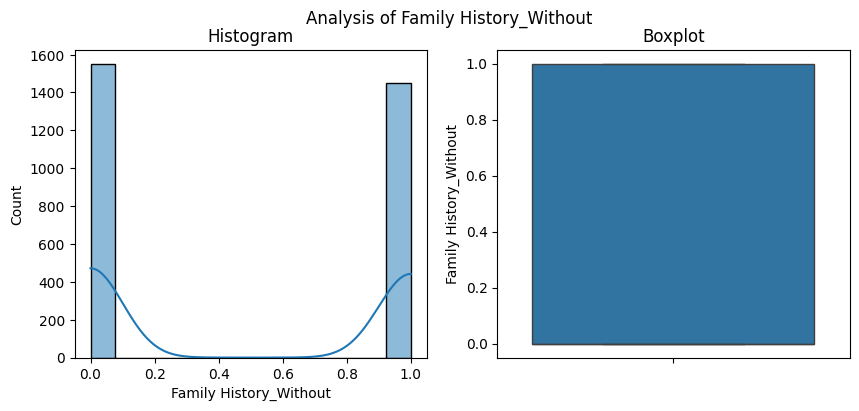

The column Family History_Without does not follow a normal distribution.



Number of variables that follow a normal distribution: 0
Number of variables that do not follow a normal distribution: 34


,Mean,Median,Mode,Variance,Standard_Deviation,Percentile_25,Percentile_75,K_test,p_value,Distribution
Feature,,,,,,,,,,
Height (cm),168.590835,168.215632,141.130985,86.359963,9.293006,161.629515,175.522665,1.000000,0.0,Not normal
Weight (kg),72.537260,71.448651,32.537672,173.995465,13.190734,63.222773,81.702801,1.000000,0.0,Not normal
Cholesterol Level (mg/dL),234.029794,234.376822,148.811514,601.300806,24.521436,216.756601,250.646674,1.000000,0.0,Not normal
BMI,25.550146,25.352113,12.049900,19.073505,4.367322,22.454115,28.403543,1.000000,0.0,Not normal
Blood Glucose Level (mg/dL),126.653909,126.802186,69.866884,332.191592,18.226124,114.392605,139.377079,1.000000,0.0,Not normal
Bone Density (g/cm²),0.931899,0.939585,-0.219787,0.196736,0.443550,0.561063,1.294570,0.543898,0.0,Not normal
Vision Sharpness,0.474591,0.462070,0.200000,0.043985,0.209726,0.281671,0.639498,0.579260,0.0,Not normal
Hearing Ability (dB),47.016214,46.963733,0.000000,205.534196,14.336464,36.734775,56.828847,0.999632,0.0,Not normal
Physical Activity Level,0.929667,1.000000,1.000000,0.526229,0.725416,0.000000,1.000000,0.540678,0.0,Not normal


In [51]:
fn.get_univariate_analysis(df_train)

## 7. Bivariate Analysis
An bivariate analysis is performed. In order to perform the analysis, an heatmap is used.

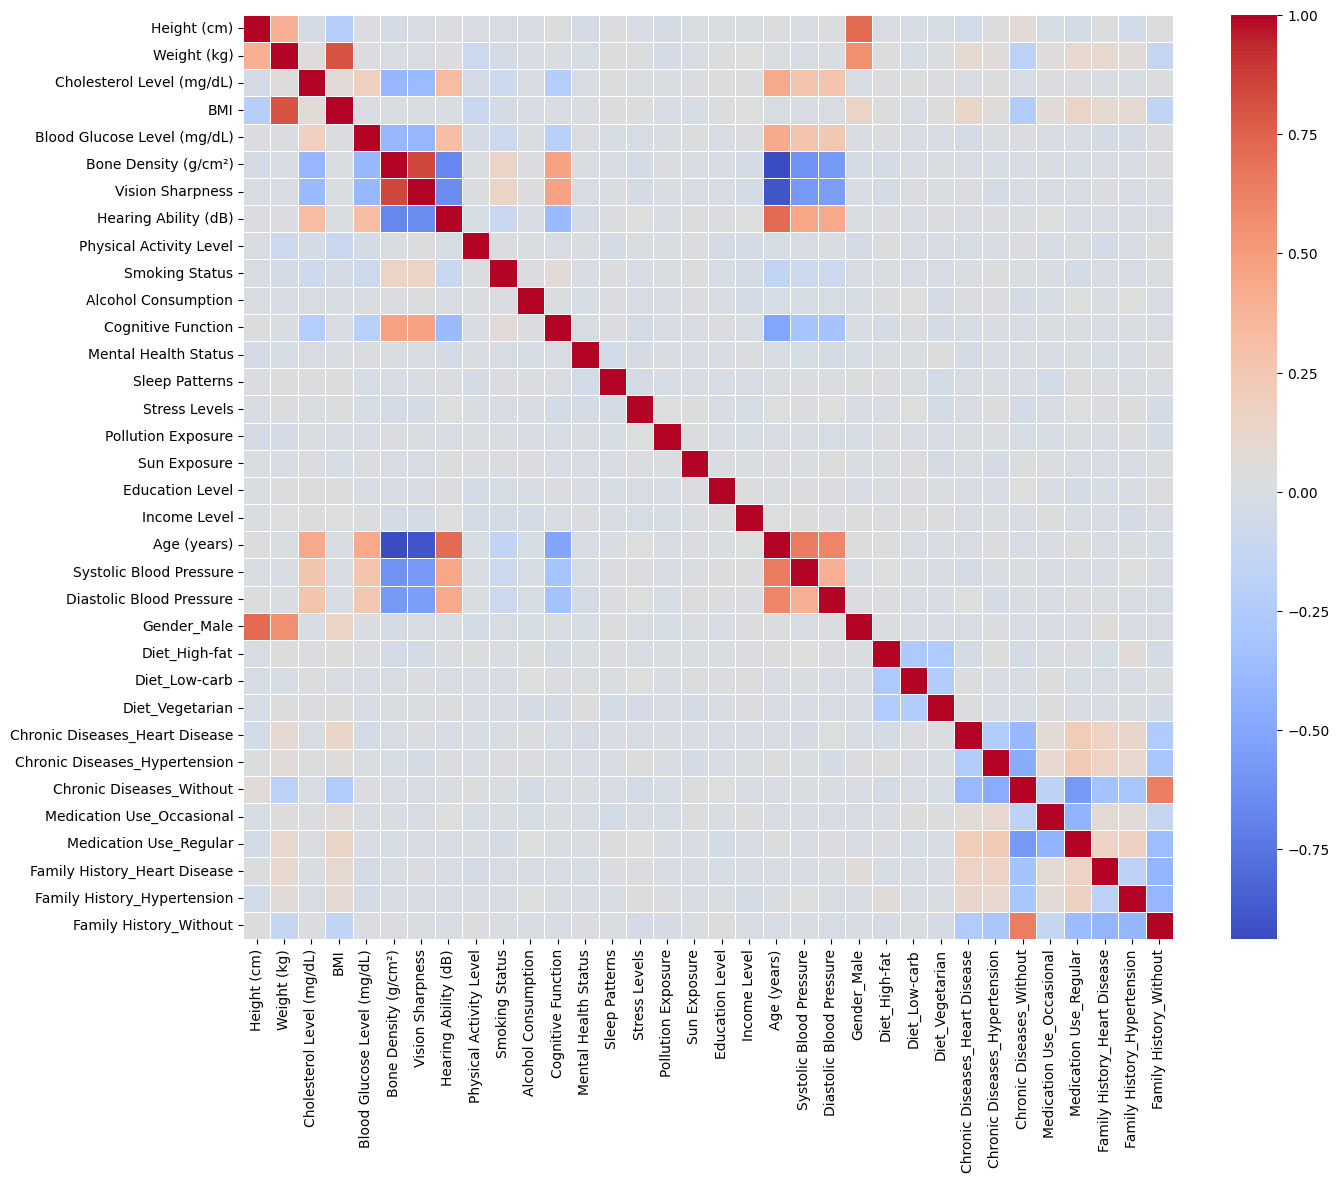

In [54]:
# Set the size of the figure
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

# Create the heatmap
sns.heatmap(df_train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adjust label size to make them readable
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels if needed

# Show the plot
plt.show()

In [53]:
# Calculate the correlation matrix
corr = df_train.corr()

# Filter for correlations greater than 0.75 or less than -0.75
filtered_corr = corr[(corr > 0.75) | (corr < -0.75)]

# Drop rows and columns where all but one value is NaN
# Keep only rows and columns with at least 2 non-NaN values
df_cleaned = filtered_corr.dropna(thresh=2, axis=1)  # Drop columns
df_cleaned = df_cleaned.dropna(thresh=2, axis=0)     # Drop rows

# Display the final cleaned dataframe
df_cleaned

,Weight (kg),BMI,Bone Density (g/cm²),Vision Sharpness,Age (years)
Weight (kg),1.00000,0.80015,NaN,NaN,NaN
BMI,0.80015,1.00000,NaN,NaN,NaN
Bone Density (g/cm²),NaN,NaN,1.000000,0.846140,-0.937712
Vision Sharpness,NaN,NaN,0.846140,1.000000,-0.899692
Age (years),NaN,NaN,-0.937712,-0.899692,1.000000


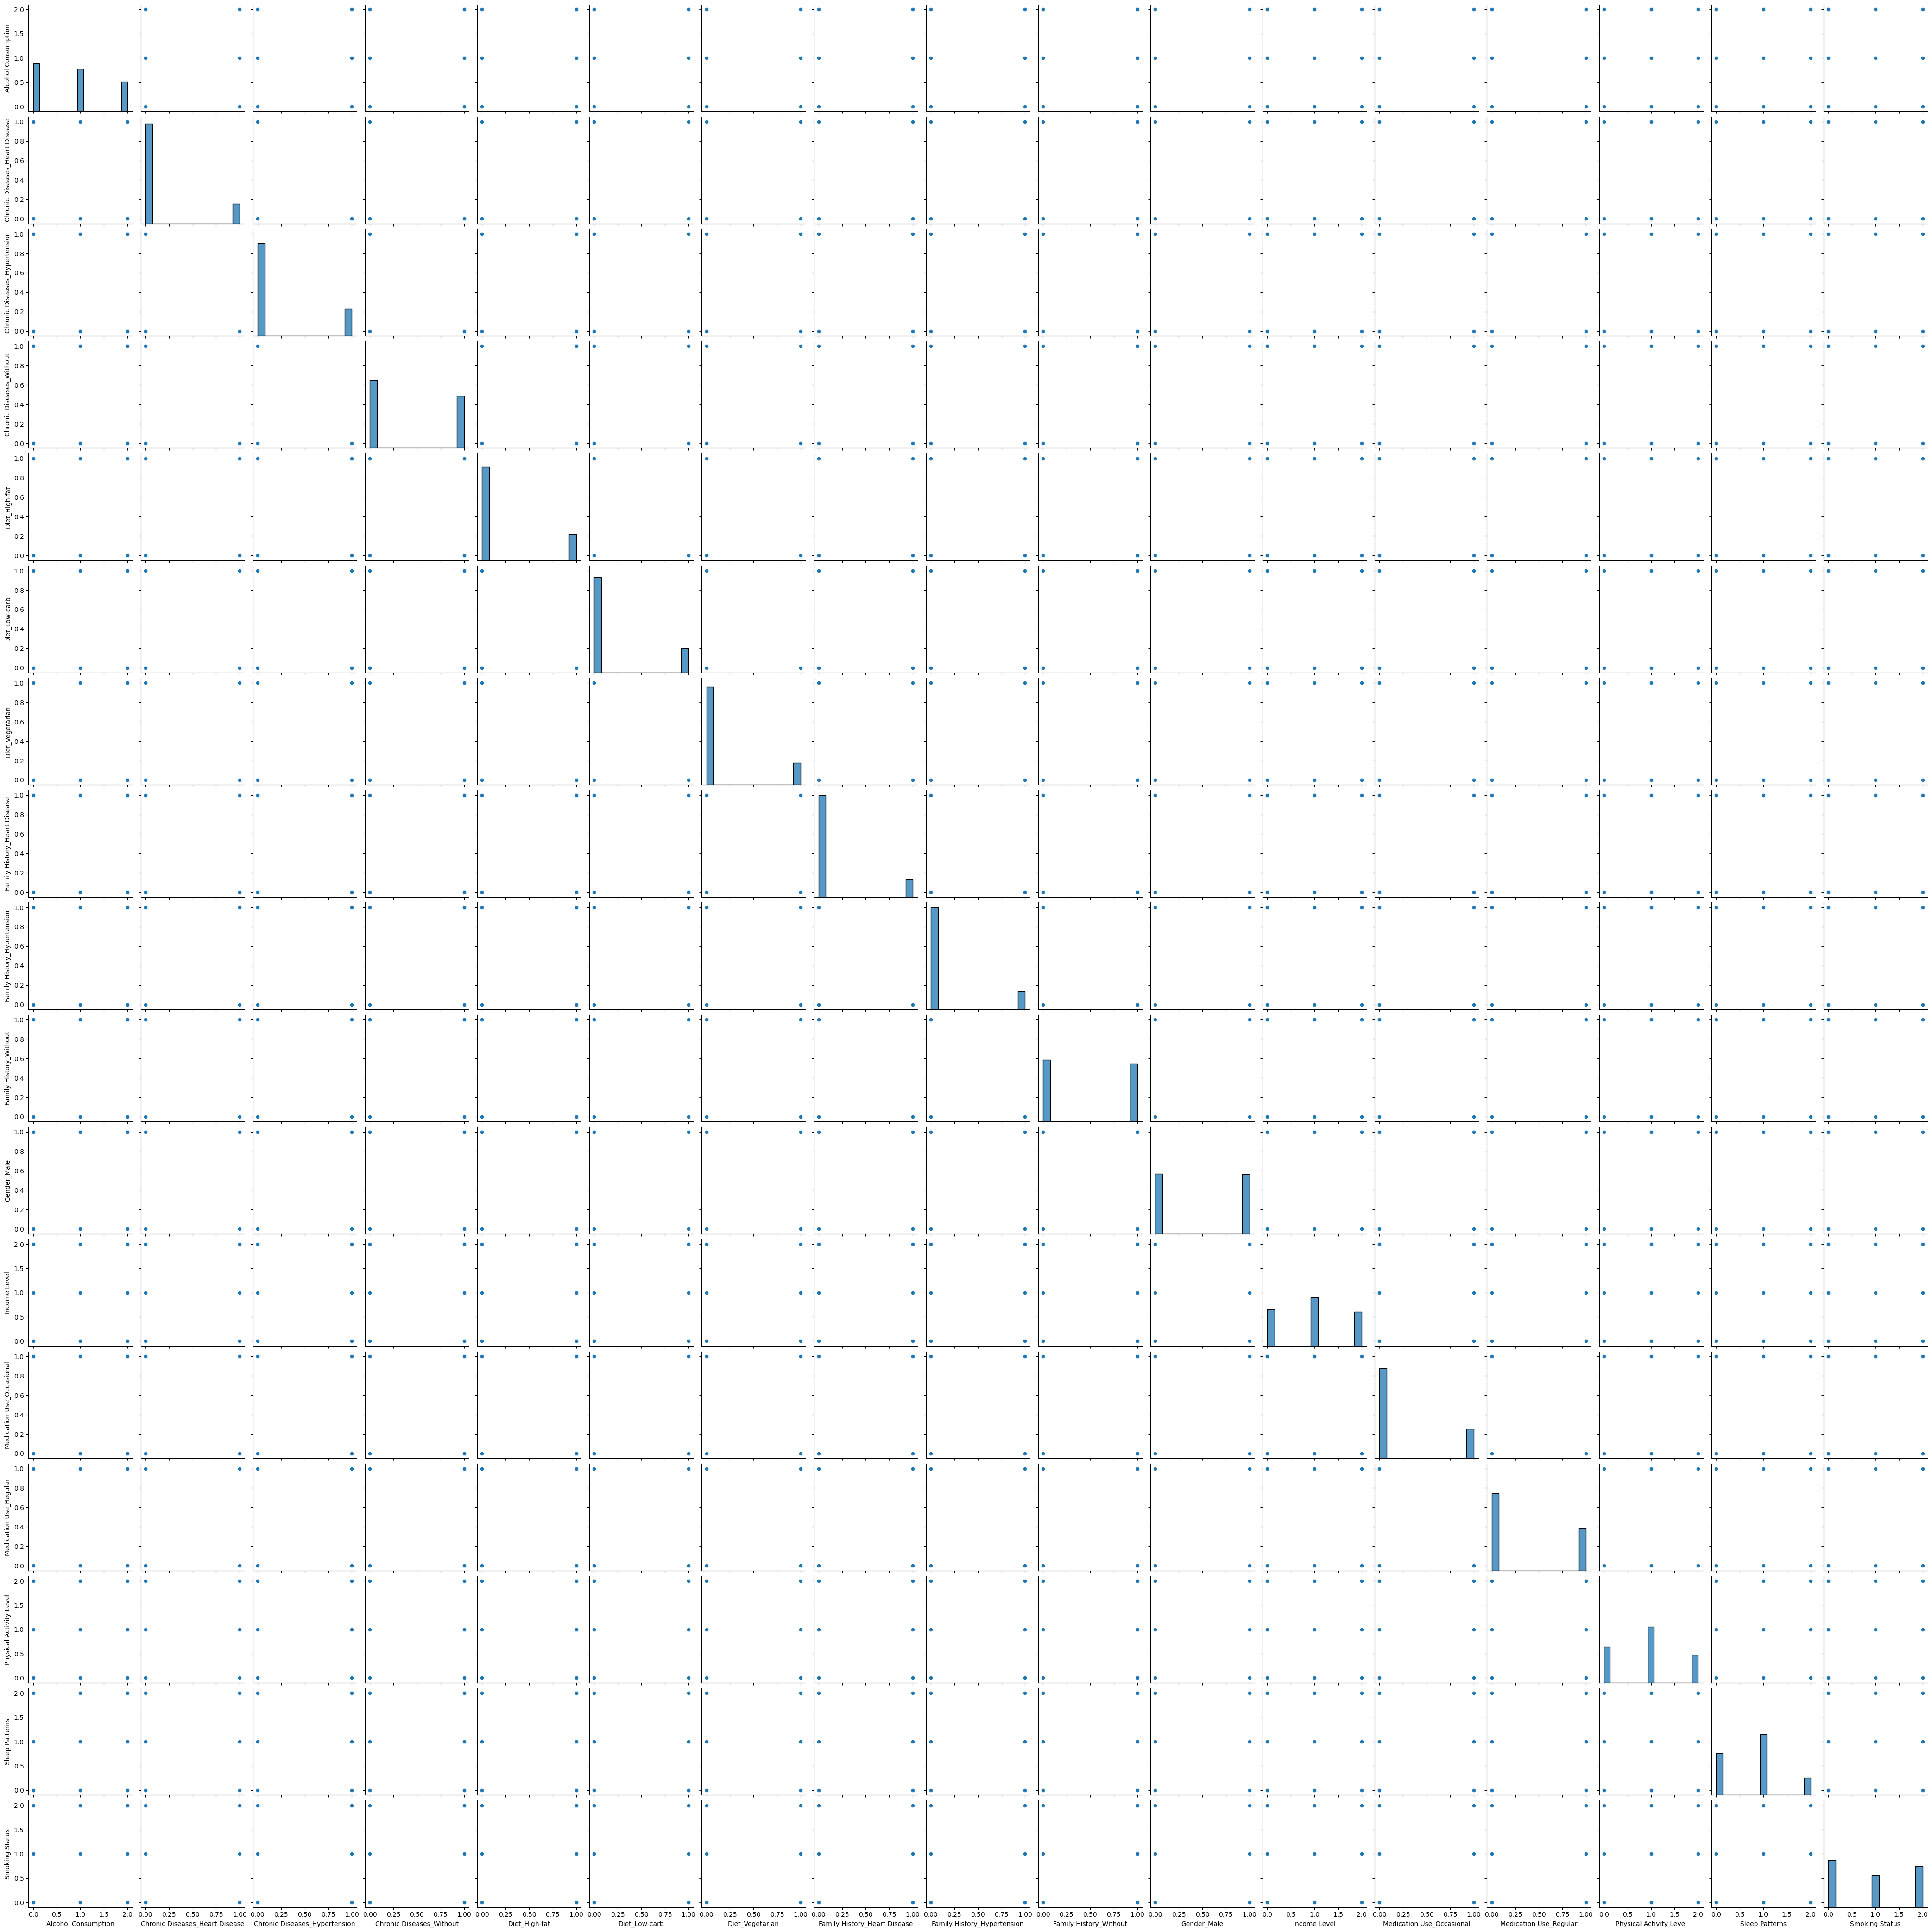

In [57]:
# Count the number of unique values for each feature
unique_counts = df_train.nunique()

# Find features with exactly two unique values
features_with_two_unique = unique_counts[unique_counts >= 4].index

# Filter out features with two unique values
features_to_include = df_train.columns.difference(features_with_two_unique)
df_filtered = df_train[features_to_include]

# Create the pairplot with the filtered DataFrame
sns.pairplot(df_filtered)
plt.show()

## 8. Conclusion  
  
It is determined that none of the features follow a normal distribution.

On the other hand, it is observed that the target column "Age" has a high correlation with the features "Bone Density" and "Vision Sharpness." Additionally, these two features show a strong positive correlation with each other.

Apart from these correlations, the features "Weight" and "BMI" also show a high positive correlation, which makes sense since BMI is derived from weight.